In [18]:
import networkit as nk
import numpy as np
import pandas as pd
import re

In [19]:
all_data = pd.read_csv("../results/time.csv", sep=";")
all_data = all_data[ all_data["Flag"] == "2expnode"]
all_data

,Code,Graph,Flag,Community computation,Nodes computation,GLR computation,Total
0,python,"2expnode(n=10240, m=50000).graph",2expnode,0.687500,3.734375,48.703125,48.703125
1,python,"2expnode(n=1280, m=50000).graph",2expnode,0.015625,0.218750,1.906250,1.906250
2,python,"2expnode(n=20480, m=50000).graph",2expnode,1.109375,14.453125,79.750000,79.750000
3,python,"2expnode(n=2560, m=50000).graph",2expnode,0.125000,1.031250,6.640625,6.640625
4,python,"2expnode(n=40960, m=50000).graph",2expnode,1.359375,97.593750,346.406250,346.437500
5,python,"2expnode(n=5120, m=50000).graph",2expnode,0.296875,1.703125,15.578125,15.578125
6,python,"2expnode(n=640, m=50000).graph",2expnode,0.015625,0.046875,1.515625,1.515625


In [20]:
"""
grouped = all_data.groupby("Graph")
all_mean = grouped.aggregate("mean")
all_mean
"""

'\ngrouped = all_data.groupby("Graph")\nall_mean = grouped.aggregate("mean")\nall_mean\n'

In [21]:
pattern = r"n=(\d+),\s*m=(\d+)"
all_data["n"] = all_data['Graph'].apply(lambda graph_name : int(re.search(pattern, graph_name).group(1)))
all_data["m"] = all_data['Graph'].apply(lambda graph_name : int(re.search(pattern, graph_name).group(2)))
all_data

,Code,Graph,Flag,Community computation,Nodes computation,GLR computation,Total,n,m
0,python,"2expnode(n=10240, m=50000).graph",2expnode,0.687500,3.734375,48.703125,48.703125,10240,50000
1,python,"2expnode(n=1280, m=50000).graph",2expnode,0.015625,0.218750,1.906250,1.906250,1280,50000
2,python,"2expnode(n=20480, m=50000).graph",2expnode,1.109375,14.453125,79.750000,79.750000,20480,50000
3,python,"2expnode(n=2560, m=50000).graph",2expnode,0.125000,1.031250,6.640625,6.640625,2560,50000
4,python,"2expnode(n=40960, m=50000).graph",2expnode,1.359375,97.593750,346.406250,346.437500,40960,50000
5,python,"2expnode(n=5120, m=50000).graph",2expnode,0.296875,1.703125,15.578125,15.578125,5120,50000
6,python,"2expnode(n=640, m=50000).graph",2expnode,0.015625,0.046875,1.515625,1.515625,640,50000


In [22]:
all_data.sort_values(by=["n"], inplace=True)
all_data

,Code,Graph,Flag,Community computation,Nodes computation,GLR computation,Total,n,m
6,python,"2expnode(n=640, m=50000).graph",2expnode,0.015625,0.046875,1.515625,1.515625,640,50000
1,python,"2expnode(n=1280, m=50000).graph",2expnode,0.015625,0.218750,1.906250,1.906250,1280,50000
3,python,"2expnode(n=2560, m=50000).graph",2expnode,0.125000,1.031250,6.640625,6.640625,2560,50000
5,python,"2expnode(n=5120, m=50000).graph",2expnode,0.296875,1.703125,15.578125,15.578125,5120,50000
0,python,"2expnode(n=10240, m=50000).graph",2expnode,0.687500,3.734375,48.703125,48.703125,10240,50000
2,python,"2expnode(n=20480, m=50000).graph",2expnode,1.109375,14.453125,79.750000,79.750000,20480,50000
4,python,"2expnode(n=40960, m=50000).graph",2expnode,1.359375,97.593750,346.406250,346.437500,40960,50000


<Axes: xlabel='n', ylabel='Total'>

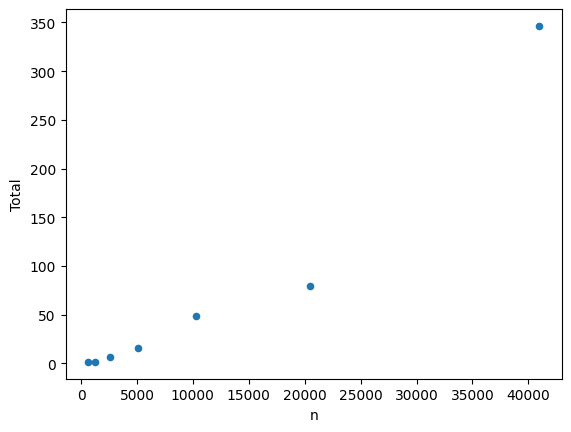

In [23]:
all_data.plot(x='n', y='Total', kind='scatter')

<Axes: xlabel='ID', ylabel='Total'>

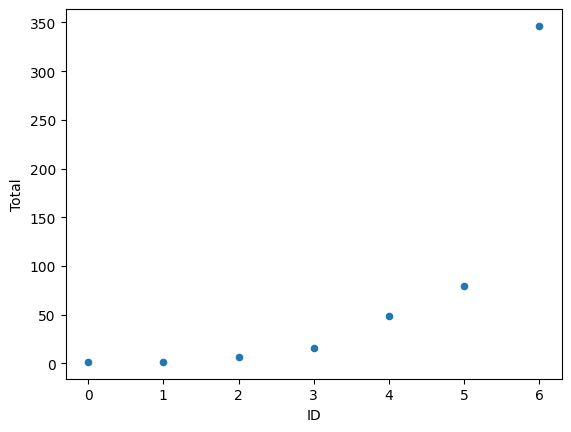

In [24]:
all_data["ID"] = [i for i in range(len(all_data))]
all_data.plot(x="ID", y='Total', kind='scatter')

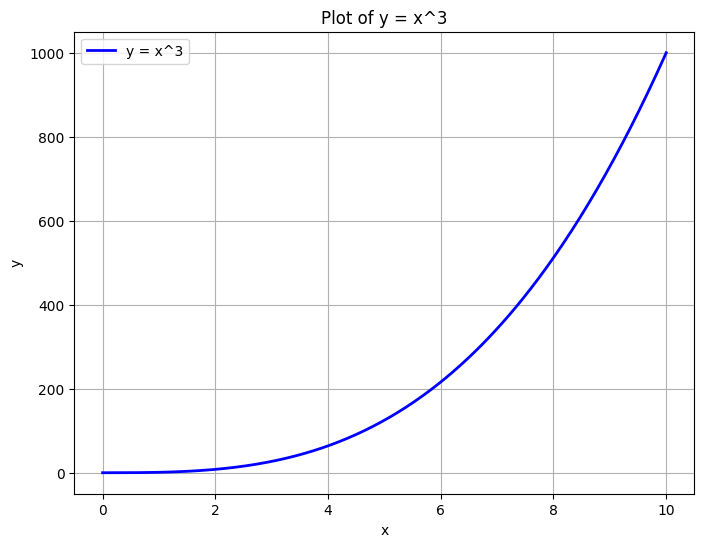

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x values from -10 to 10
x = np.linspace(0, 10, 400)  # 400 points between -10 and 10

# Calculate corresponding y values (x^3)
y = x**3

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = x^3', color='blue', linewidth=2)

# Add labels and title
plt.title('Plot of y = x^3')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()
